In [8]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels import robust
from scipy.stats import wilcoxon
from scipy.stats.mstats import mquantiles
import statsmodels.api as sm
from statsmodels.formula.api import ols
from matplotlib import collections as matcoll
%matplotlib inline

In [23]:
oneway = pd.read_table('C:/Users/Veena Chintala/Desktop/320/oneway.txt', sep=',', header=0)

In [24]:
list(oneway)

['Growth', 'Photoperiod']

In [25]:
oneway

,Growth,Photoperiod
0,2,Very.short
1,3,Very.short
2,1,Very.short
3,1,Very.short
4,2,Very.short
5,1,Very.short
6,3,Short
7,4,Short
8,2,Short
9,1,Short


In [27]:
tapply1 = oneway.groupby('Photoperiod')
tapply1.mean()

,Growth
Photoperiod,
Long,2.500000
Short,2.166667
Very.long,3.166667
Very.short,1.666667


In [28]:
oneWayModel = ols('Growth ~ Photoperiod', data=oneway).fit()
aov_table = sm.stats.anova_lm(oneWayModel, typ=1)
print(aov_table)

               df  sum_sq  mean_sq         F    PR(>F)
Photoperiod   3.0   7.125    2.375  1.461538  0.255072
Residual     20.0  32.500    1.625       NaN       NaN


In [47]:
twoway = pd.read_csv('C:/Users/Veena Chintala/Desktop/320/twoway.txt', sep="\t", header=0)

In [48]:
list(twoway)

['Growth', 'Photoperiod', 'Genotype']

In [49]:
twoway

,Growth,Photoperiod,Genotype
0,2,Very.short,A
1,3,Very.short,B
2,1,Very.short,C
3,1,Very.short,D
4,2,Very.short,E
5,1,Very.short,F
6,3,Short,A
7,4,Short,B
8,2,Short,C
9,1,Short,D


In [50]:
tapply2 = twoway.groupby('Genotype').mean()
tapply2

,Growth
Genotype,
A,3.00
B,4.50
C,1.50
D,1.50
E,2.00
F,1.75


In [51]:
formula = 'Growth ~ C(Photoperiod) + C(Genotype)'
model = ols(formula, data=twoway).fit()
twoWayTable = sm.stats.anova_lm(model, typ=2)
print(twoWayTable)

                sum_sq    df          F    PR(>F)
C(Photoperiod)   7.125   3.0   7.702703  0.002404
C(Genotype)     27.875   5.0  18.081081  0.000007
Residual         4.625  15.0        NaN       NaN


In [52]:
factorial = pd.read_csv('C:/Users/Veena Chintala/Desktop/320/factorial.txt', sep="\t", header=0)

In [53]:
list(factorial)

['growth', 'diet', 'coat']

In [54]:
factorial

,growth,diet,coat
0,6.6,A,light
1,7.2,A,light
2,6.9,B,light
3,8.3,B,light
4,7.9,C,light
5,9.2,C,light
6,8.3,A,dark
7,8.7,A,dark
8,8.1,B,dark
9,8.5,B,dark


In [56]:
model = 'growth ~ C(diet) * C(coat)'
modelf = ols(model, data=factorial).fit()
Table = sm.stats.anova_lm(modelf, typ=2)
print(Table)

                   sum_sq   df         F    PR(>F)
C(diet)          2.660000  2.0  3.677419  0.090685
C(coat)          2.613333  1.0  7.225806  0.036145
C(diet):C(coat)  0.686667  2.0  0.949309  0.438329
Residual         2.170000  6.0       NaN       NaN


In [57]:
tapply3 = factorial.groupby('diet').mean()
tapply3

,growth
diet,
A,7.70
B,7.95
C,8.80


In [58]:
Daphnia = pd.read_csv('C:/Users/Veena Chintala/Desktop/320/Daphnia.txt', sep="\t", header=0)

In [59]:
list(Daphnia)

['Growth.rate', 'Water', 'Detergent', 'Daphnia']

In [60]:
Daphnia

,Growth.rate,Water,Detergent,Daphnia
0,2.919086,Tyne,BrandA,Clone1
1,2.492904,Tyne,BrandA,Clone1
2,3.021804,Tyne,BrandA,Clone1
3,2.350874,Tyne,BrandA,Clone2
4,3.148174,Tyne,BrandA,Clone2
5,4.423853,Tyne,BrandA,Clone2
6,4.870959,Tyne,BrandA,Clone3
7,3.897731,Tyne,BrandA,Clone3
8,5.830882,Tyne,BrandA,Clone3
9,2.302717,Tyne,BrandB,Clone1


In [64]:
Daphnia.rename(columns={'Growth.rate': 'growth'}, inplace=True)

In [65]:
Table1 = 'growth ~ C(Water)*C(Detergent)*C(Daphnia)'
modeld = ols(Table1, data=Daphnia).fit()
dfTable = sm.stats.anova_lm(modeld, typ=2)
print(dfTable)

                                     sum_sq    df          F        PR(>F)
C(Water)                           1.985063   1.0   2.850417  9.783799e-02
C(Detergent)                       2.211566   3.0   1.058553  3.754783e-01
C(Daphnia)                        39.177730   2.0  28.128284  8.228252e-09
C(Water):C(Detergent)              0.174862   3.0   0.083697  9.686075e-01
C(Water):C(Daphnia)               13.732041   2.0   9.859140  2.587304e-04
C(Detergent):C(Daphnia)           20.600559   6.0   4.930168  5.323140e-04
C(Water):C(Detergent):C(Daphnia)   5.847620   6.0   1.399465  2.343235e-01
Residual                          33.427760  48.0        NaN           NaN


In [66]:
pd.pivot_table(Daphnia, index='Detergent', columns='Daphnia', values='growth',aggfunc='mean')

Daphnia,Clone1,Clone2,Clone3
Detergent,,,
BrandA,2.732227,3.919002,5.003268
BrandB,2.929140,4.402931,4.698062
BrandC,3.071335,4.772805,4.019397
BrandD,2.626797,5.213745,2.834151


NameError: name 'plot' is not defined

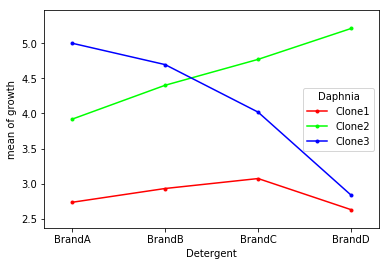

In [67]:
sm.graphics.interaction_plot(Daphnia.Detergent,Daphnia.Daphnia,Daphnia.growth)
plot.show()